In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
#Kaggle https://www.kaggle.com/competitions/bike-sharing-demand/overview
#Solution http://brandonharris.io/kaggle-bike-sharing/
all_train = pd.read_csv(r"D:\אוניברסיטה\הוראה\סדנה 2024\מצגות\train.csv")
test = pd.read_csv(r"D:\אוניברסיטה\הוראה\סדנה 2024\מצגות\test.csv")

all_train['datetime'] = pd.to_datetime(all_train['datetime'])
all_train.sort_values(by = "datetime")

test['datetime'] = pd.to_datetime(test['datetime'])

display(all_train)
display(test)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014
...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981


In [3]:
train = all_train.iloc[:int(all_train.shape[0]* 0.8)]
# train = all_train
validation = all_train.iloc[int(all_train.shape[0]* 0.8):]



## Data Exploration

In [4]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000
mean,2.226229,0.027446,0.683165,1.408705,20.086610,23.524192,61.000459,13.049091,34.025609,140.365641,174.391249
std,1.051686,0.163389,0.465269,0.636223,8.012289,8.723105,19.678804,8.302932,48.017898,136.680012,166.437885
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,0.000000,1.000000,13.940000,15.910000,46.000000,7.001500,4.000000,32.000000,38.000000
50%,2.000000,0.000000,1.000000,1.000000,20.500000,24.240000,60.000000,12.998000,15.000000,106.000000,130.000000
75%,3.000000,0.000000,1.000000,2.000000,26.240000,31.060000,77.000000,19.001200,46.000000,202.000000,259.000000
max,4.000000,1.000000,1.000000,4.000000,41.000000,45.455000,100.000000,56.996900,367.000000,790.000000,891.000000


C:\Users\Omri\AppData\Local\Temp\ipykernel_4164\3936976054.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['hour'] = train['datetime'].dt.hour


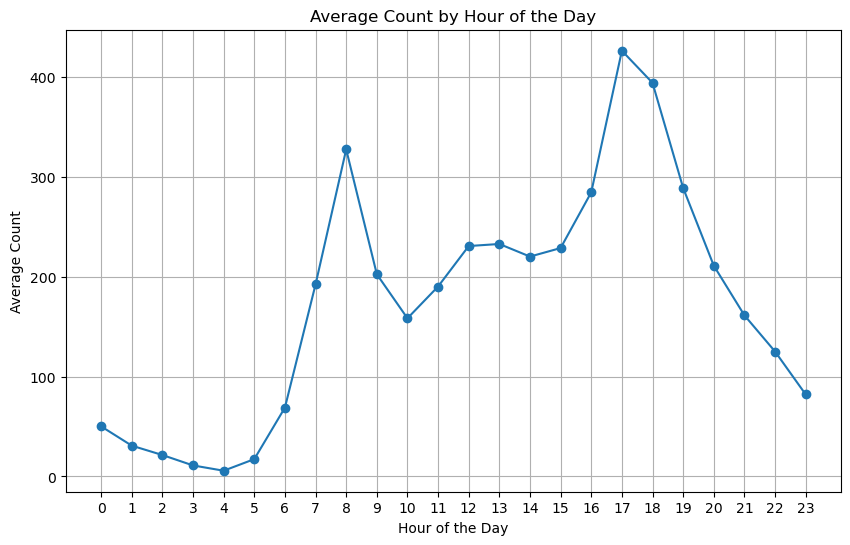

In [5]:
# sns.lineplot(data = train, x = "datetime", y = "count")
train['hour'] = train['datetime'].dt.hour

hourly_avg = train.groupby('hour')['count'].mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(hourly_avg.index, hourly_avg.values, marker='o')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Count')
plt.title('Average Count by Hour of the Day')
plt.grid(True)
plt.xticks(range(24))  # Ensure all hours are shown
plt.show()


C:\Users\Omri\AppData\Local\Temp\ipykernel_4164\3537471154.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['datetime'] = pd.to_datetime(train['datetime'])
C:\Users\Omri\AppData\Local\Temp\ipykernel_4164\3537471154.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['date'] = train['datetime'].dt.date


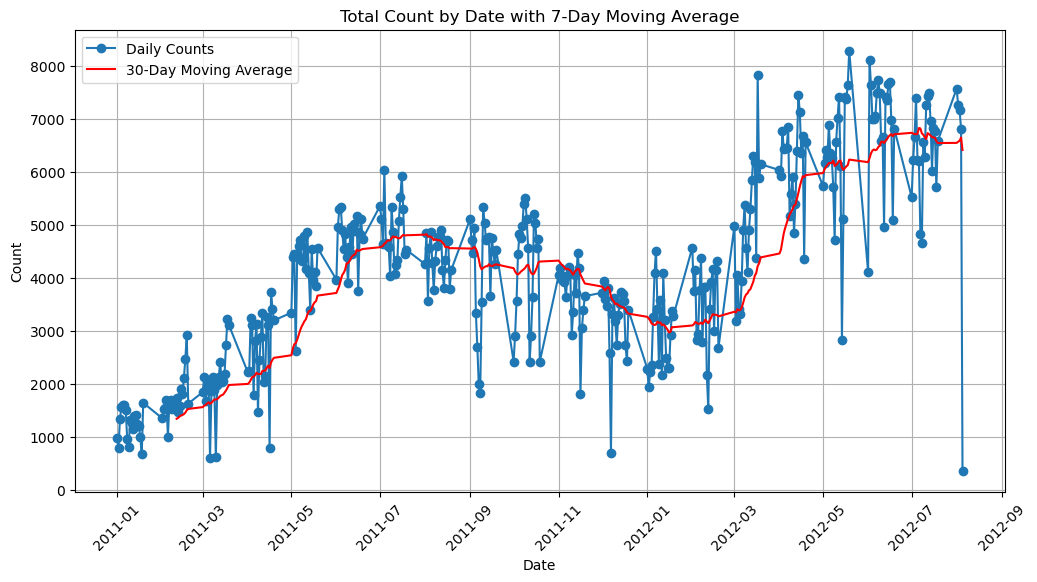

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'datetime' is a datetime type
train['datetime'] = pd.to_datetime(train['datetime'])

# Extract date from datetime
train['date'] = train['datetime'].dt.date

# Group by date and sum the counts
daily_counts = train.groupby('date')['count'].sum()

# Calculate the 7-day moving average
moving_avg = daily_counts.rolling(window=30).mean()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(daily_counts.index, daily_counts.values, marker='o', linestyle='-', label='Daily Counts')
plt.plot(moving_avg.index, moving_avg.values, marker='', linestyle='-', color='red', label='30-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Total Count by Date with 7-Day Moving Average')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

C:\Users\Omri\AppData\Local\Temp\ipykernel_4164\565812490.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['day_of_week'] = train['datetime'].dt.dayofweek


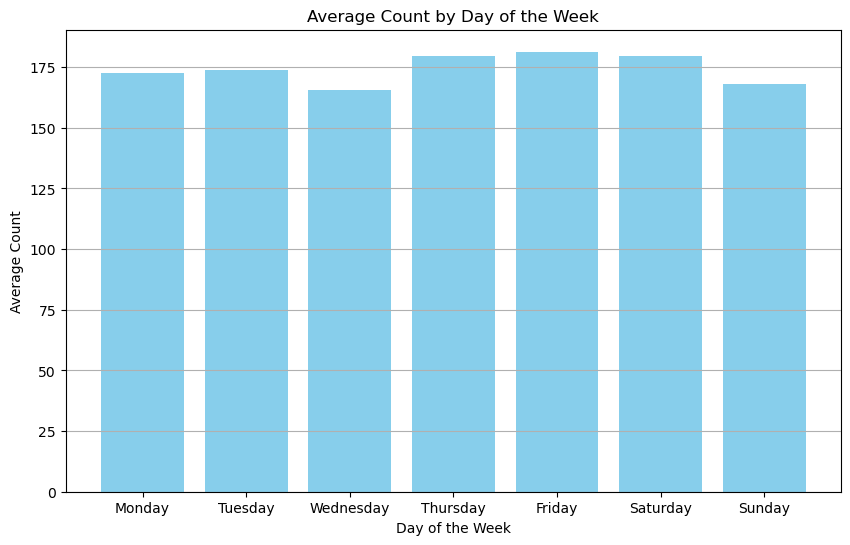

In [7]:
train['day_of_week'] = train['datetime'].dt.dayofweek

# Group by day of the week and calculate the mean of 'count'
weekly_avg = train.groupby('day_of_week')['count'].mean()

# Map day of week numbers to names
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_avg.index = [days[day] for day in weekly_avg.index]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(weekly_avg.index, weekly_avg.values, color='skyblue')
plt.xlabel('Day of the Week')
plt.ylabel('Average Count')
plt.title('Average Count by Day of the Week')
plt.grid(True, axis='y')
plt.show()

C:\Users\Omri\AppData\Local\Temp\ipykernel_4164\1029140934.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['day_of_week'] = train['datetime'].dt.dayofweek


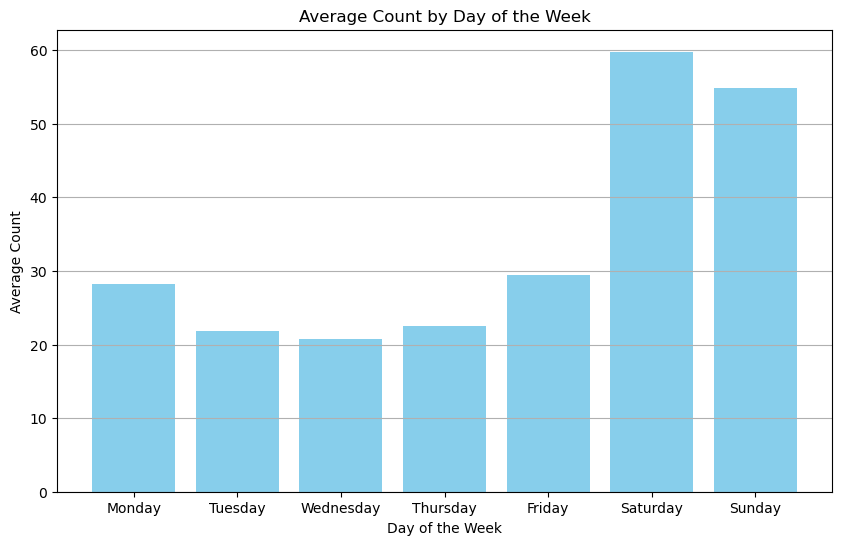

In [8]:
train['day_of_week'] = train['datetime'].dt.dayofweek

# Group by day of the week and calculate the mean of 'count'
weekly_avg = train.groupby('day_of_week')['casual'].mean()

# Map day of week numbers to names
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_avg.index = [days[day] for day in weekly_avg.index]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(weekly_avg.index, weekly_avg.values, color='skyblue')
plt.xlabel('Day of the Week')
plt.ylabel('Average Count')
plt.title('Average Count by Day of the Week')
plt.grid(True, axis='y')
plt.show()

In [9]:
train.corr()[["casual", "registered", "count"]]

,casual,registered,count
season,0.110929,0.099545,0.113750
holiday,0.045423,-0.024456,-0.006979
workingday,-0.318526,0.117763,0.004812
weather,-0.140831,-0.124501,-0.142872
temp,0.475978,0.358516,0.431737
atemp,0.473061,0.355590,0.428493
humidity,-0.336938,-0.280263,-0.327362
windspeed,0.086232,0.093637,0.101773
casual,1.000000,0.511530,0.708575
registered,0.511530,1.000000,0.968785


In [10]:
train.corr().loc["temp", "atemp"]

0.9924736553922362

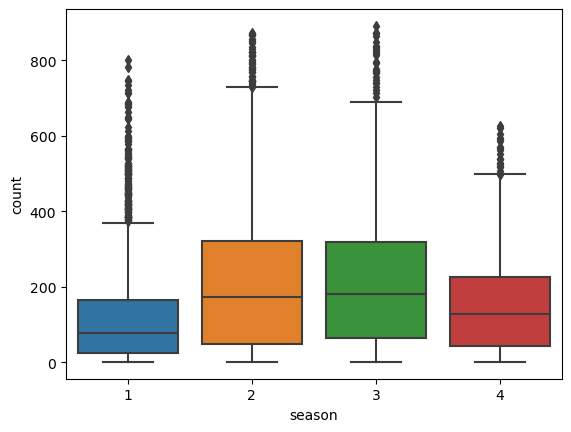

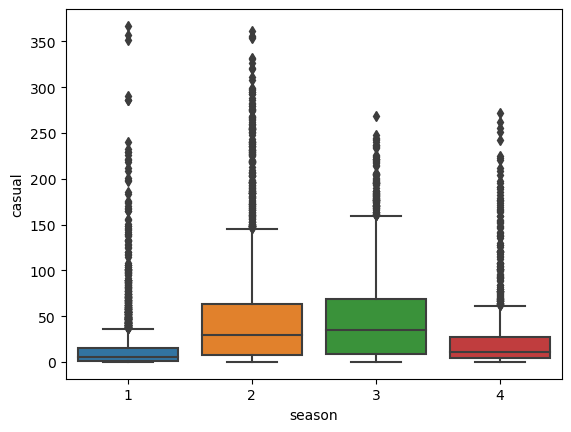

<AxesSubplot:xlabel='season', ylabel='registered'>

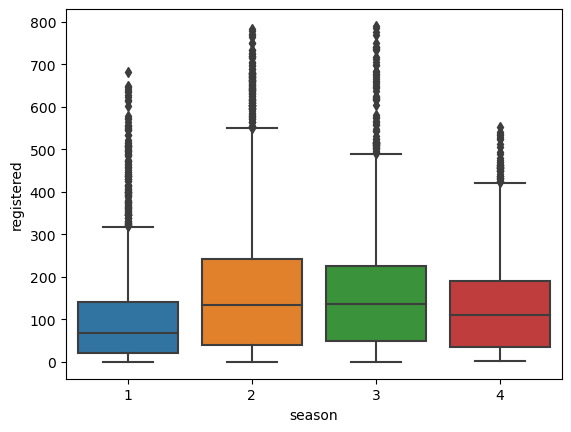

In [11]:
sns.boxplot(data = train, y = "count", x= "season")
plt.show()
sns.boxplot(data = train, y = "casual", x= "season")
plt.show()
sns.boxplot(data = train, y = "registered", x= "season")


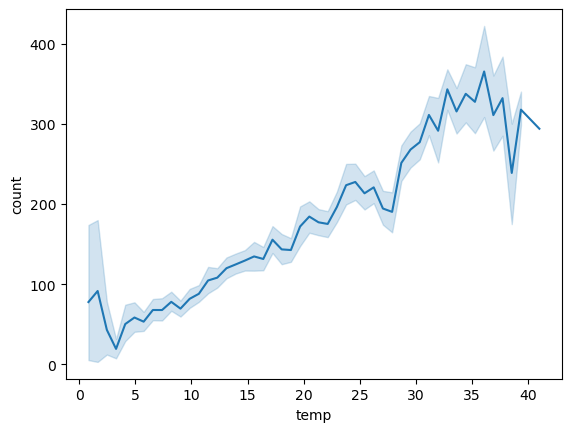

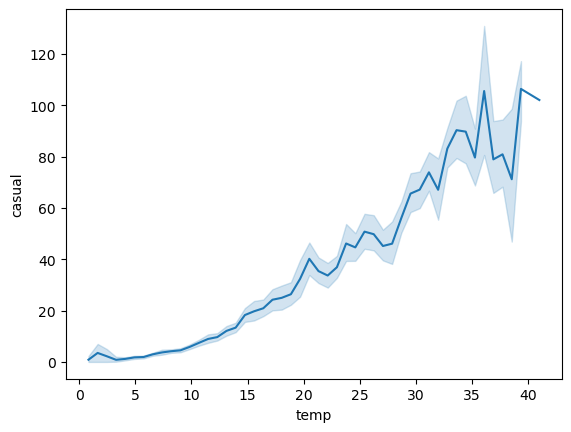

In [12]:
sns.lineplot(data = train, x = "temp", y = "count")
plt.show()

sns.lineplot(data = train, x = "temp", y = "casual")
plt.show()

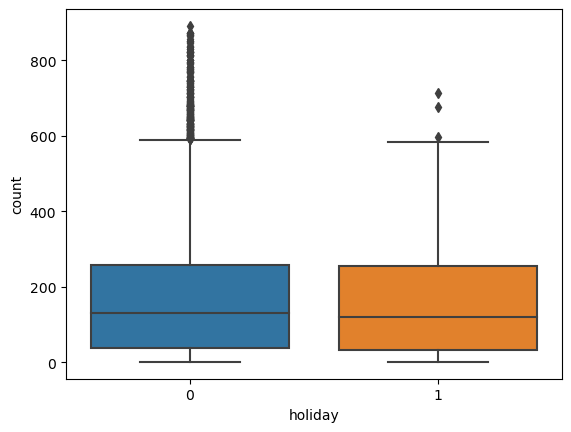

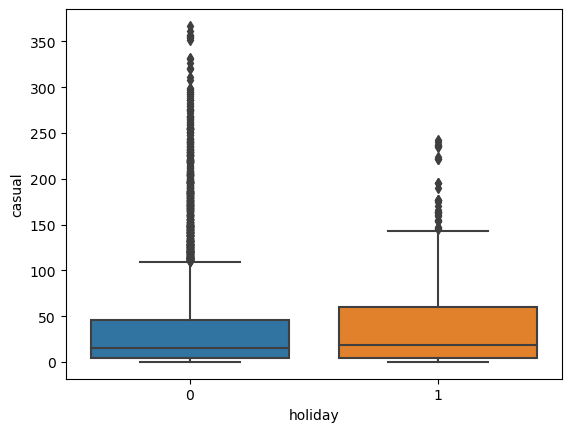

<AxesSubplot:xlabel='holiday', ylabel='registered'>

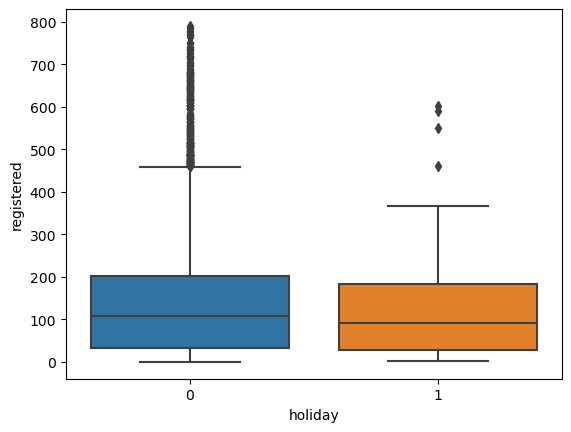

In [13]:
sns.boxplot(data = train, y = "count", x= "holiday")
plt.show()
sns.boxplot(data = train, y = "casual", x= "holiday")
plt.show()
sns.boxplot(data = train, y = "registered", x= "holiday")


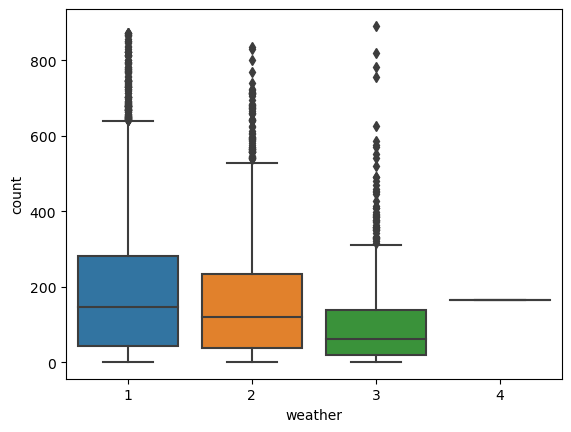

In [14]:
sns.boxplot(data = train, y = "count", x= "weather")
plt.show()

## Feature engineering

In [15]:
train['day_of_week'] = train['datetime'].dt.dayofweek

# Convert the day of the week to one-hot encoded columns
one_hot_encoded_days = pd.get_dummies(train['day_of_week'], prefix='day')

# Combine the one-hot encoded columns with the original DataFrame
train = pd.concat([train, one_hot_encoded_days], axis=1)

# Drop the original 'day_of_week' column if you don't need it anymore
train.drop('day_of_week', axis=1, inplace=True)
train

C:\Users\Omri\AppData\Local\Temp\ipykernel_4164\3394217539.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['day_of_week'] = train['datetime'].dt.dayofweek


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,count,hour,date,day_0,day_1,day_2,day_3,day_4,day_5,day_6
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,...,16,0,2011-01-01,0,0,0,0,0,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,...,40,1,2011-01-01,0,0,0,0,0,1,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,...,32,2,2011-01-01,0,0,0,0,0,1,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,...,13,3,2011-01-01,0,0,0,0,0,1,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,...,1,4,2011-01-01,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8703,2012-08-05 00:00:00,3,0,0,1,30.34,34.850,70,19.0012,32,...,153,0,2012-08-05,0,0,0,0,0,0,1
8704,2012-08-05 01:00:00,3,0,0,1,30.34,34.850,70,16.9979,8,...,87,1,2012-08-05,0,0,0,0,0,0,1
8705,2012-08-05 02:00:00,3,0,0,1,30.34,34.850,70,19.9995,5,...,73,2,2012-08-05,0,0,0,0,0,0,1
8706,2012-08-05 03:00:00,3,0,0,1,29.52,34.850,74,16.9979,9,...,41,3,2012-08-05,0,0,0,0,0,0,1


In [16]:
train["year"] = train['datetime'].dt.year

In [17]:
one_hot_encoded_days = pd.get_dummies(train['weather'], prefix='weather')

# Combine the one-hot encoded columns with the original DataFrame
train = pd.concat([train, one_hot_encoded_days], axis=1)

# Drop the original 'day_of_week' column if you don't need it anymore

train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,day_2,day_3,day_4,day_5,day_6,year,weather_1,weather_2,weather_3,weather_4
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,...,0,0,0,1,0,2011,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,...,0,0,0,1,0,2011,1,0,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,...,0,0,0,1,0,2011,1,0,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,...,0,0,0,1,0,2011,1,0,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,...,0,0,0,1,0,2011,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8703,2012-08-05 00:00:00,3,0,0,1,30.34,34.850,70,19.0012,32,...,0,0,0,0,1,2012,1,0,0,0
8704,2012-08-05 01:00:00,3,0,0,1,30.34,34.850,70,16.9979,8,...,0,0,0,0,1,2012,1,0,0,0
8705,2012-08-05 02:00:00,3,0,0,1,30.34,34.850,70,19.9995,5,...,0,0,0,0,1,2012,1,0,0,0
8706,2012-08-05 03:00:00,3,0,0,1,29.52,34.850,74,16.9979,9,...,0,0,0,0,1,2012,1,0,0,0


In [18]:
train['hour'] = train['datetime'].dt.hour

# Create one-hot encoding columns for the specified time ranges
train['hour_23_06'] = train['hour'].apply(lambda x: 1 if (x >= 23 or x <= 6) else 0)
train['hour_07_09'] = train['hour'].apply(lambda x: 1 if (x >= 7 and x <= 9) else 0)
train['hour_10_16'] = train['hour'].apply(lambda x: 1 if (x >= 10 and x <= 16) else 0)
train['hour_17_19'] = train['hour'].apply(lambda x: 1 if (x >= 17 and x <= 19) else 0)
train['hour_20_22'] = train['hour'].apply(lambda x: 1 if (x >= 20 and x <= 22) else 0)

# Drop the original 'hour' column if you don't need it anymore
train.drop('hour', axis=1, inplace=True)

train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,year,weather_1,weather_2,weather_3,weather_4,hour_23_06,hour_07_09,hour_10_16,hour_17_19,hour_20_22
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,...,2011,1,0,0,0,1,0,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,...,2011,1,0,0,0,1,0,0,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,...,2011,1,0,0,0,1,0,0,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,...,2011,1,0,0,0,1,0,0,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,...,2011,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8703,2012-08-05 00:00:00,3,0,0,1,30.34,34.850,70,19.0012,32,...,2012,1,0,0,0,1,0,0,0,0
8704,2012-08-05 01:00:00,3,0,0,1,30.34,34.850,70,16.9979,8,...,2012,1,0,0,0,1,0,0,0,0
8705,2012-08-05 02:00:00,3,0,0,1,30.34,34.850,70,19.9995,5,...,2012,1,0,0,0,1,0,0,0,0
8706,2012-08-05 03:00:00,3,0,0,1,29.52,34.850,74,16.9979,9,...,2012,1,0,0,0,1,0,0,0,0


## Modeling

In [19]:
data_to_train = train[['holiday', 'workingday', 'temp',
       'humidity', 'windspeed', 
       'day_0', 'day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6',
       'weather_1', 'weather_2', 'weather_3', 'weather_4', 'hour_23_06',
       'hour_07_09', 'hour_10_16', 'hour_17_19', 'hour_20_22', "year"]]

mod_all = RandomForestRegressor()
mod_all.fit(data_to_train, train["count"])

mod_casual = RandomForestRegressor()
mod_casual.fit(data_to_train, train["casual"])
mod_reg = RandomForestRegressor()
mod_reg.fit(data_to_train, train["registered"])

mod_naive = RandomForestRegressor()
mod_naive.fit(train[['season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed']], train["count"])

RandomForestRegressor()

## Testing

In [20]:
validation['day_of_week'] = validation['datetime'].dt.dayofweek

# Convert the day of the week to one-hot encoded columns
one_hot_encoded_days = pd.get_dummies(validation['day_of_week'], prefix='day')

# Combine the one-hot encoded columns with the original DataFrame
validation = pd.concat([validation, one_hot_encoded_days], axis=1)

# Drop the original 'day_of_week' column if you don't need it anymore
validation.drop('day_of_week', axis=1, inplace=True)

one_hot_encoded_days = pd.get_dummies(validation['weather'], prefix='weather')
validation["weather_4"] = 0
# Combine the one-hot encoded columns with the original DataFrame
validation = pd.concat([validation, one_hot_encoded_days], axis=1)

# Drop the original 'day_of_week' column if you don't need it anymore

validation['hour'] = validation['datetime'].dt.hour

# Create one-hot encoding columns for the specified time ranges
validation['hour_23_06'] = validation['hour'].apply(lambda x: 1 if (x >= 23 or x <= 6) else 0)
validation['hour_07_09'] = validation['hour'].apply(lambda x: 1 if (x >= 7 and x <= 9) else 0)
validation['hour_10_16'] = validation['hour'].apply(lambda x: 1 if (x >= 10 and x <= 16) else 0)
validation['hour_17_19'] = validation['hour'].apply(lambda x: 1 if (x >= 17 and x <= 19) else 0)
validation['hour_20_22'] = validation['hour'].apply(lambda x: 1 if (x >= 20 and x <= 22) else 0)

# Drop the original 'hour' column if you don't need it anymore
validation.drop('hour', axis=1, inplace=True)

validation["year"] = validation['datetime'].dt.year

C:\Users\Omri\AppData\Local\Temp\ipykernel_4164\1717171500.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['day_of_week'] = validation['datetime'].dt.dayofweek


In [21]:
validation_subset = validation[['holiday', 'workingday', 'temp',
       'humidity', 'windspeed', 
       'day_0', 'day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6',
       'weather_1', 'weather_2', 'weather_3', 'weather_4', 'hour_23_06',
       'hour_07_09', 'hour_10_16', 'hour_17_19', 'hour_20_22', "year"]]

all_pred = mod_all.predict(validation_subset)

summary = pd.DataFrame(all_pred)
summary.columns = ["all_pred"]

summary["casual_pred"] = mod_casual.predict(validation_subset)
 

summary["reg_pred"] = mod_reg.predict(validation_subset)

summary["comb_pred"] = summary["casual_pred"] + summary["reg_pred"]

summary["naive_pred"] = mod_naive.predict(validation[['season', 'holiday', 'workingday', 'weather', 'temp',
                        'atemp', 'humidity', 'windspeed']])

summary["true_res"] = list(validation["count"])
summary["datetime"] = list(validation["datetime"])
summary.corr()["true_res"]

all_pred       0.883771
casual_pred    0.566111
reg_pred       0.865982
comb_pred      0.880903
naive_pred     0.443154
true_res       1.000000
Name: true_res, dtype: float64

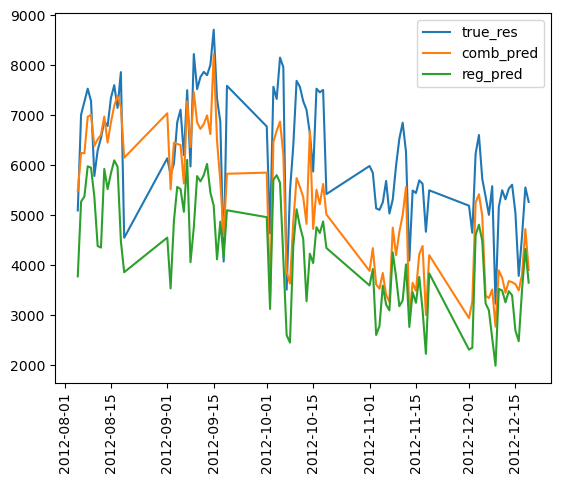

In [22]:
summary['date'] = summary['datetime'].dt.date
daily_counts = summary.groupby('date').sum()

plt.plot(daily_counts.index, daily_counts["true_res"], label = "true_res")
plt.plot(daily_counts.index, daily_counts["comb_pred"], label = "comb_pred")
plt.plot(daily_counts.index, daily_counts["reg_pred"], label = "reg_pred")
# plt.plot(daily_counts.index, daily_counts["naive_pred"], label = "naive_pred")

plt.xticks(rotation=90)
plt.legend()

In [23]:
print(mean_squared_error(summary["true_res"], summary["naive_pred"]))
print(mean_squared_error(summary["true_res"], summary["reg_pred"]))
print(mean_squared_error(summary["true_res"], summary["comb_pred"]))

43755.175873913344
20836.143764621964
12728.605640698266


In [24]:
test['day_of_week'] = test['datetime'].dt.dayofweek

# Convert the day of the week to one-hot encoded columns
one_hot_encoded_days = pd.get_dummies(test['day_of_week'], prefix='day')

# Combine the one-hot encoded columns with the original DataFrame
test = pd.concat([test, one_hot_encoded_days], axis=1)

# Drop the original 'day_of_week' column if you don't need it anymore
test.drop('day_of_week', axis=1, inplace=True)

one_hot_encoded_days = pd.get_dummies(test['weather'], prefix='weather')

# Combine the one-hot encoded columns with the original DataFrame
test = pd.concat([test, one_hot_encoded_days], axis=1)

# Drop the original 'day_of_week' column if you don't need it anymore

test['hour'] = test['datetime'].dt.hour

# Create one-hot encoding columns for the specified time ranges
test['hour_23_06'] = test['hour'].apply(lambda x: 1 if (x >= 23 or x <= 6) else 0)
test['hour_07_09'] = test['hour'].apply(lambda x: 1 if (x >= 7 and x <= 9) else 0)
test['hour_10_16'] = test['hour'].apply(lambda x: 1 if (x >= 10 and x <= 16) else 0)
test['hour_17_19'] = test['hour'].apply(lambda x: 1 if (x >= 17 and x <= 19) else 0)
test['hour_20_22'] = test['hour'].apply(lambda x: 1 if (x >= 20 and x <= 22) else 0)

# Drop the original 'hour' column if you don't need it anymore
test.drop('hour', axis=1, inplace=True)
test["year"] = test['datetime'].dt.year


In [25]:
test_subset = test[['holiday', 'workingday', 'temp',
       'humidity', 'windspeed', 
       'day_0', 'day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6',
       'weather_1', 'weather_2', 'weather_3', 'weather_4', 'hour_23_06',
       'hour_07_09', 'hour_10_16', 'hour_17_19', 'hour_20_22', "year"]]

all_pred = mod_all.predict(test_subset)

summary = pd.DataFrame(all_pred)
summary.columns = ["all_pred"]

summary["casual_pred"] = mod_casual.predict(test_subset)
 

summary["reg_pred"] = mod_reg.predict(test_subset)

summary["comb_pred"] = summary["casual_pred"] + summary["reg_pred"]

summary["naive_pred"] = mod_naive.predict(test[['season', 'holiday', 'workingday', 'weather', 'temp',
                        'atemp', 'humidity', 'windspeed']])


summary["datetime"] = list(test["datetime"])


In [26]:
# summary.to_csv(r"D:\kaggle.csv")

